<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab1/B41_E22CSEU1213_Kanishka/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

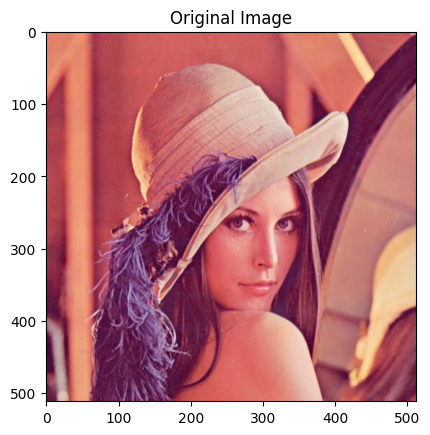

Image Size (Height, Width, Channels): (512, 512, 3)
Total Pixels: 262144


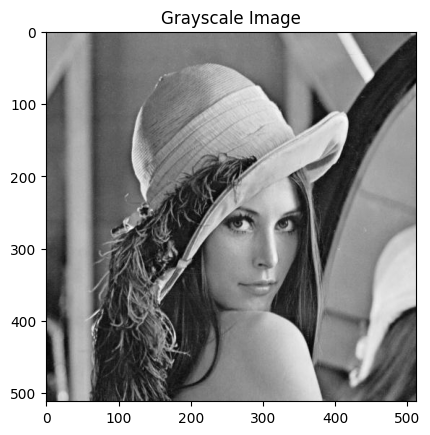

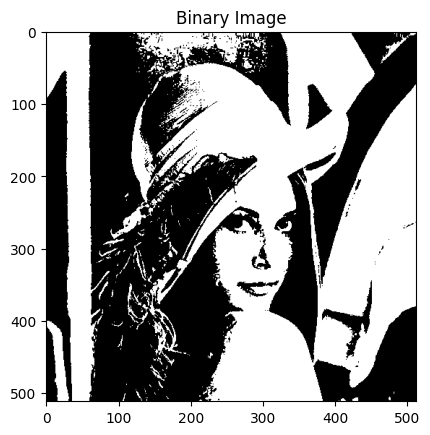

Black Pixel Count: 130668


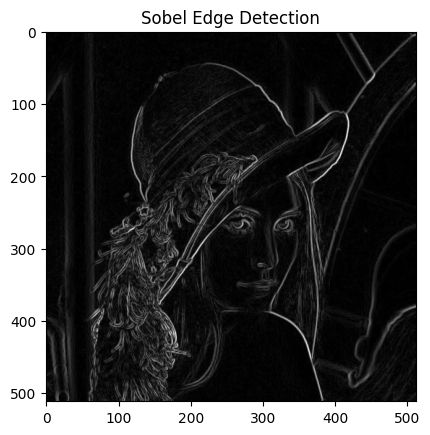

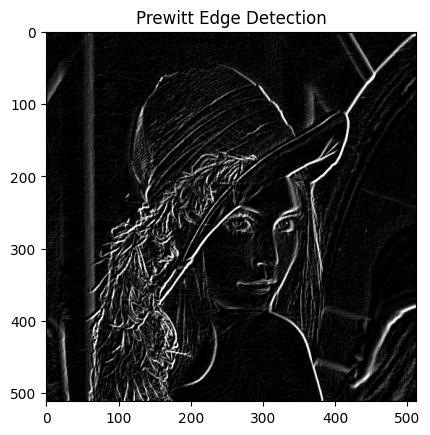

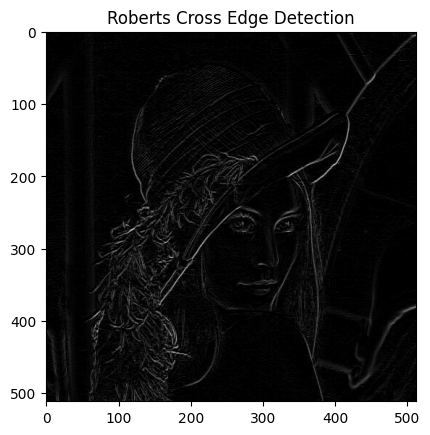

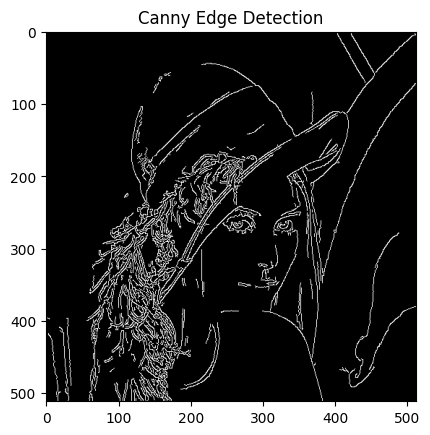

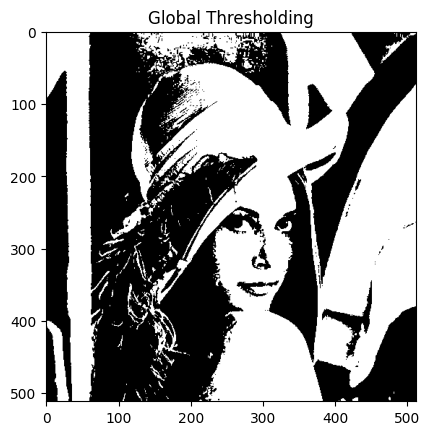

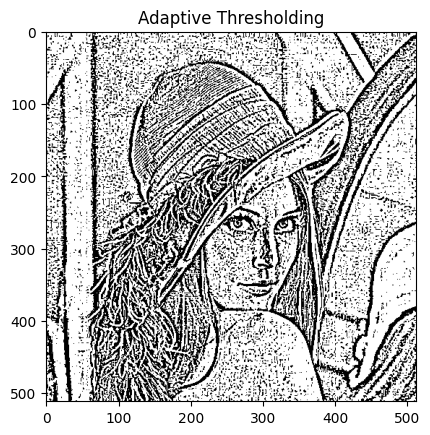

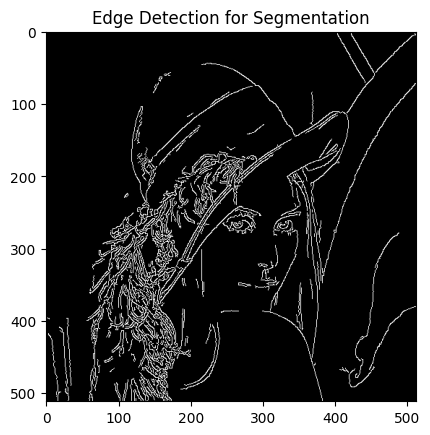

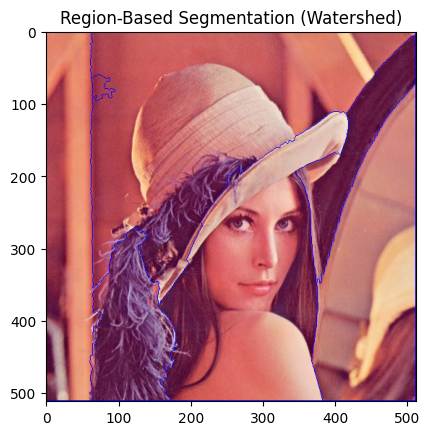

In [1]:
# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Task-1: Image Manipulation
# 1. Read the image
image_path = "/content/cv_image.jpg"  # Replace with your image file path
image = cv2.imread(image_path)

# 2. Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

# 3. Extraction of Image Size
image_size = image.shape
print(f"Image Size (Height, Width, Channels): {image_size}")

# 4. Calculation of Image Pixels
total_pixels = image_size[0] * image_size[1]
print(f"Total Pixels: {total_pixels}")

# 5. Convert RGB (BGR in OpenCV) to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_image.jpg", gray_image)
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.show()

# 6. Convert Grayscale to Binary using a threshold
threshold = 128  # Define threshold value
_, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary_image.jpg", binary_image)
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image")
plt.show()

# Count the area of black pixels
black_pixel_count = np.sum(binary_image == 0)
print(f"Black Pixel Count: {black_pixel_count}")

# Task-2: Edge Detection and Image Segmentation
# 1. Perform edge detection
# i. Sobel Operator
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)
plt.imshow(sobel_edge, cmap="gray")
plt.title("Sobel Edge Detection")
plt.show()

# ii. Prewitt Operator
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv2.filter2D(gray_image, -1, kernelx)
prewitt_y = cv2.filter2D(gray_image, -1, kernely)
prewitt_edge = cv2.add(prewitt_x, prewitt_y)
plt.imshow(prewitt_edge, cmap="gray")
plt.title("Prewitt Edge Detection")
plt.show()

# iii. Roberts Cross Operator
roberts_kernelx = np.array([[1, 0], [0, -1]])
roberts_kernely = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(gray_image, -1, roberts_kernelx)
roberts_y = cv2.filter2D(gray_image, -1, roberts_kernely)
roberts_edge = cv2.add(roberts_x, roberts_y)
plt.imshow(roberts_edge, cmap="gray")
plt.title("Roberts Cross Edge Detection")
plt.show()

# iv. Canny Edge Detector
canny_edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(canny_edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.show()

# 2. Image Segmentation
# i. Global Thresholding
_, global_thresh = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresh, cmap="gray")
plt.title("Global Thresholding")
plt.show()

# ii. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)
plt.imshow(adaptive_thresh, cmap="gray")
plt.title("Adaptive Thresholding")
plt.show()

# iii. Edge Detection for Segmentation (Canny Edge)
plt.imshow(canny_edges, cmap="gray")
plt.title("Edge Detection for Segmentation")
plt.show()

# iv. Region-Based Segmentation (Watershed Algorithm)
# Convert to grayscale and find markers
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
distance_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, markers = cv2.threshold(distance_transform, 0.7 * distance_transform.max(), 255, 0)
markers = np.uint8(markers)
markers = cv2.connectedComponents(markers)[1]

# Apply Watershed
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Region-Based Segmentation (Watershed)")
plt.show()
